In [4]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
spark = SparkSession.builder.appName("HomeworkDataAnalysis").getOrCreate()
departments = ["Marketing", "Sales", "Customer Service", "Operations", "Research", "Human Resource"]
names = ["Erlyn", "Abimanyu", "Jati", "Priyo", "Lily", "Ebyil"]

data = []
for i in range(120):
    name = random.choice(names)
    dept = random.choice(departments)
    age = random.randint(22, 55)
    salary = random.randint(4_000_000, 15_000_000)
    data.append((i + 1, name, dept, age, salary))

columns = ["EmpID", "Name", "Department", "Age", "Salary"]
df = spark.createDataFrame(data, columns)
df.createOrReplaceTempView("employees")

df.show(6)


25/10/29 07:45:46 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+-----+-----+--------------+---+--------+
|EmpID| Name|    Department|Age|  Salary|
+-----+-----+--------------+---+--------+
|    1| Jati|         Sales| 23|14617531|
|    2|Erlyn|         Sales| 52| 7427817|
|    3|Erlyn|     Marketing| 47|11086573|
|    4|Erlyn|    Operations| 55| 6187057|
|    5|Priyo|     Marketing| 45| 9050966|
|    6| Lily|Human Resource| 46|10825805|
+-----+-----+--------------+---+--------+
only showing top 6 rows



         Department  TotalEmployees  TotalSalary
0        Operations              28    280626838
1  Customer Service              20    205166657
2         Marketing              22    200517805
3             Sales              19    195793364
4          Research              16    186587382
5    Human Resource              15    145920235


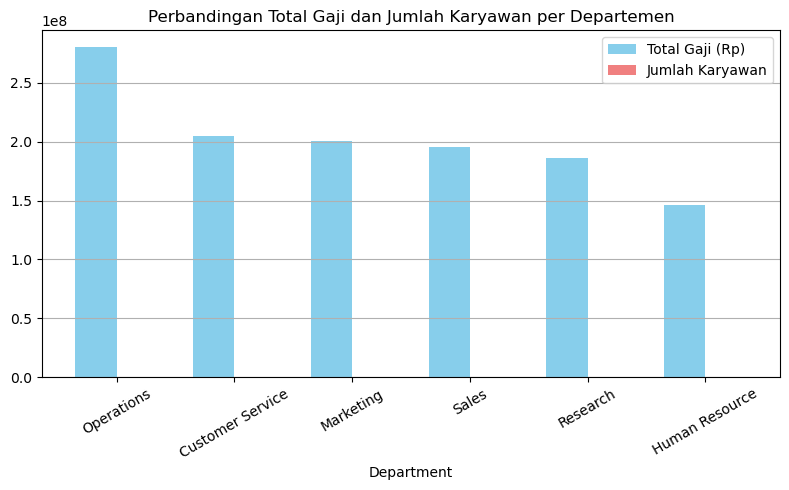

In [9]:
#nomor 1 HOMEWORK
dept_summary = spark.sql('''
SELECT 
    Department,
    COUNT(Name) AS TotalEmployees,
    SUM(Salary) AS TotalSalary
FROM employees
GROUP BY Department
ORDER BY TotalSalary DESC
''').toPandas()

print(dept_summary)

# Visualisasi perbandingan antar departemen
plt.figure(figsize=(8,5))
bar_width = 0.35
x = np.arange(len(dept_summary['Department']))

plt.bar(x - bar_width/2, dept_summary['TotalSalary'], bar_width, label='Total Gaji (Rp)', color='skyblue')
plt.bar(x + bar_width/2, dept_summary['TotalEmployees'], bar_width, label='Jumlah Karyawan', color='lightcoral')

plt.xticks(x, dept_summary['Department'], rotation=30)
plt.xlabel('Department')
plt.title('Perbandingan Total Gaji dan Jumlah Karyawan per Departemen')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


       Name  Age    Salary
0      Lily   24  12450753
1      Lily   46  10825805
2      Jati   23  14617531
3     Erlyn   47  11086573
4     Erlyn   44  11976976
5      Jati   52   9192882
6  Abimanyu   43  12730858
7     Erlyn   46  14885474
8  Abimanyu   34  14610372
9     Priyo   55  12967122


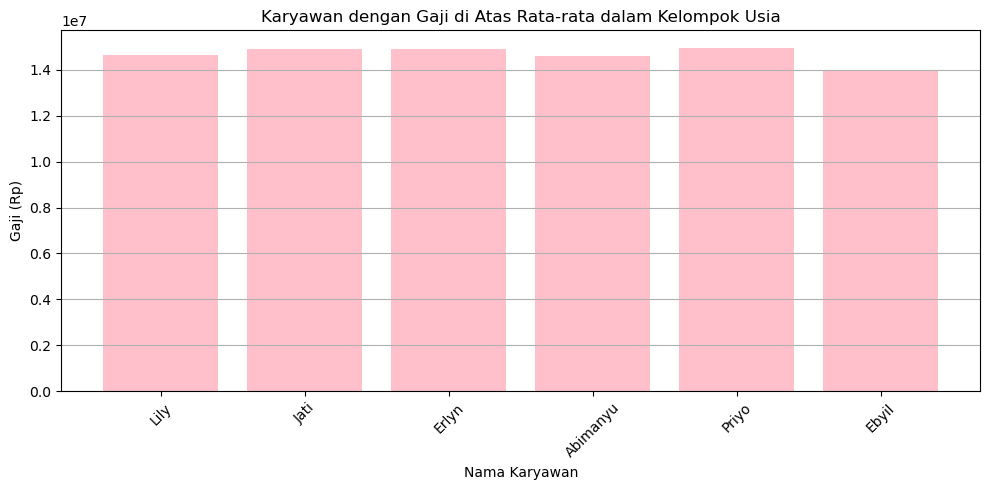

In [10]:
#nomor 2 HOMEWORK
above_avg_salary = spark.sql('''
SELECT Name, Age, Salary
FROM employees e
WHERE Salary > (
    SELECT AVG(Salary)
    FROM employees e2
    WHERE e2.Age BETWEEN e.Age - 2 AND e.Age + 2
)
''').toPandas()

print(above_avg_salary.head(10))

# Visualisasi
plt.figure(figsize=(10,5))
plt.bar(above_avg_salary['Name'], above_avg_salary['Salary'], color='pink')
plt.xticks(rotation=45)
plt.xlabel('Nama Karyawan')
plt.ylabel('Gaji (Rp)')
plt.title('Karyawan dengan Gaji di Atas Rata-rata dalam Kelompok Usia')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


         Department            DeptDescription  JumlahKaryawan  RataRataGaji  \
0        Operations         Operasional Harian              28    10022387.0   
1  Customer Service          Layanan Pelanggan              20    10258333.0   
2         Marketing         Promosi & Kampanye              22     9114446.0   
3             Sales           Penjualan Produk              19    10304914.0   
4          Research  Penelitian & Pengembangan              16    11661711.0   
5    Human Resource            Pengelolaan SDM              15     9728016.0   

   TotalGaji  
0  280626838  
1  205166657  
2  200517805  
3  195793364  
4  186587382  
5  145920235  


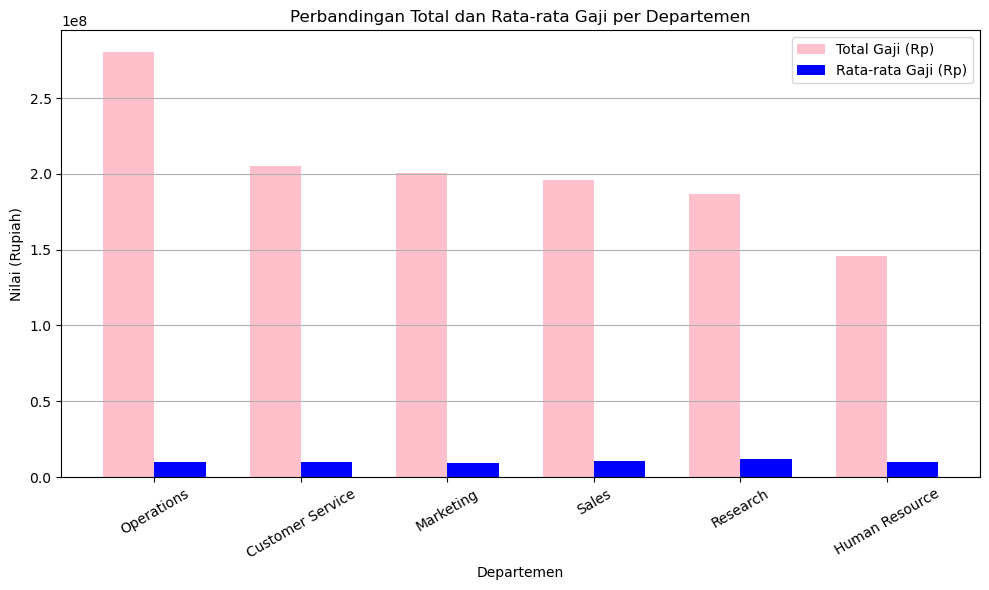

In [12]:
#nomor 3 HOMEWORK
data_departments = [
    ("Marketing", "Promosi & Kampanye"),
    ("Sales", "Penjualan Produk"),
    ("Customer Service", "Layanan Pelanggan"),
    ("Operations", "Operasional Harian"),
    ("Research", "Penelitian & Pengembangan"),
    ("Human Resource", "Pengelolaan SDM")
]

dept_columns = ["Department", "DeptDescription"]
dept_df = spark.createDataFrame(data_departments, dept_columns)
dept_df.createOrReplaceTempView("departments")
analysis = spark.sql('''
SELECT 
    e.Department,
    d.DeptDescription,
    COUNT(e.Name) AS JumlahKaryawan,
    ROUND(AVG(e.Salary), 0) AS RataRataGaji,
    SUM(e.Salary) AS TotalGaji
FROM employees e
JOIN departments d ON e.Department = d.Department
GROUP BY e.Department, d.DeptDescription
ORDER BY TotalGaji DESC
''').toPandas()

print(analysis)

# Visualisasi
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
x = np.arange(len(analysis['Department']))
bar_width = 0.35

plt.bar(x - bar_width/2, analysis['TotalGaji'], width=bar_width, label='Total Gaji (Rp)', color='pink')
plt.bar(x + bar_width/2, analysis['RataRataGaji'], width=bar_width, label='Rata-rata Gaji (Rp)', color='blue')

plt.xticks(x, analysis['Department'], rotation=30)
plt.xlabel('Departemen')
plt.ylabel('Nilai (Rupiah)')
plt.title('Perbandingan Total dan Rata-rata Gaji per Departemen')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
